In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm


In [2]:
df=pd.read_csv("D:\\assignment\mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.shape

(2000, 26)

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


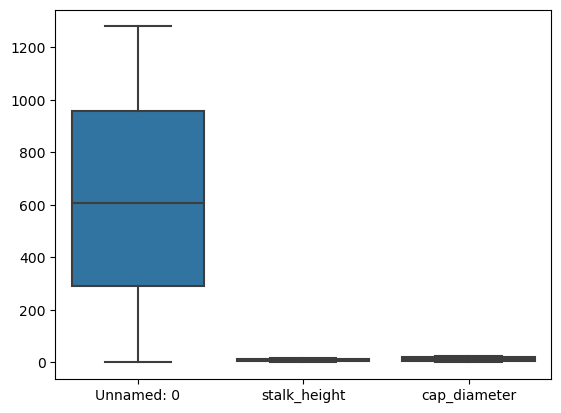

In [6]:
sns.boxplot(data=df)
plt.show()

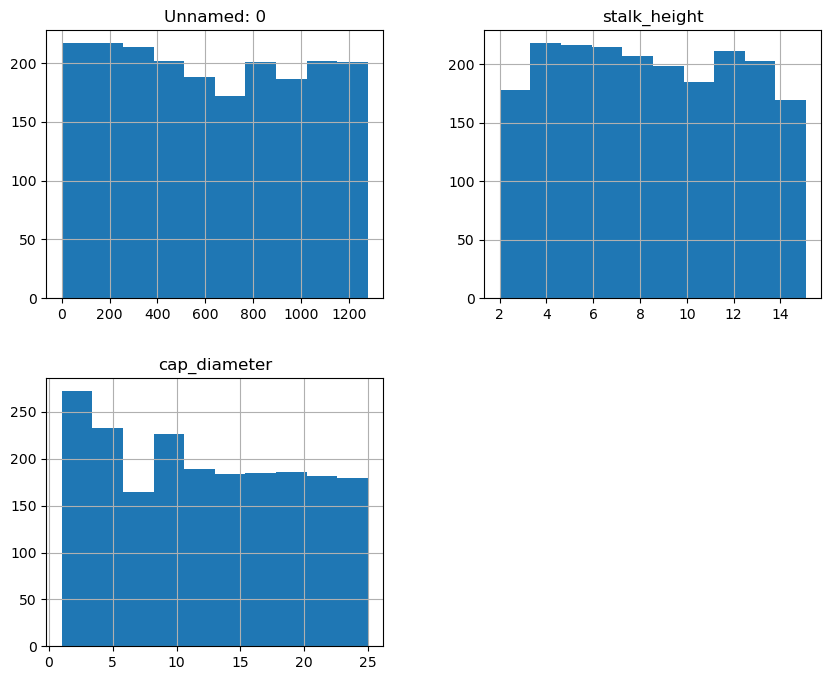

In [7]:
df.hist(figsize=(10, 8))
plt.show()


In [8]:
# df.corr()

In [9]:
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [10]:
label=LabelEncoder()
df['cap_shape']=label.fit_transform(df['cap_shape'])
df['cap_surface']=label.fit_transform(df['cap_surface'])
df['cap_color']=label.fit_transform(df['cap_color'])
df['bruises']=label.fit_transform(df['bruises'])
df['odor']=label.fit_transform(df['odor'])
df['gill_attachment']=label.fit_transform(df['gill_attachment'])
df['gill_spacing']=label.fit_transform(df['gill_spacing'])
df['gill_size']=label.fit_transform(df['gill_size'])
df['stalk_shape']=label.fit_transform(df['stalk_shape'])
df['stalk_root']=label.fit_transform(df['stalk_root'])
df['stalk_surface_above_ring']=label.fit_transform(df['stalk_surface_above_ring'])
df['stalk_surface_below_ring']=label.fit_transform(df['stalk_surface_below_ring'])
df['stalk_color_above_ring']=label.fit_transform(df['stalk_color_above_ring'])
df['stalk_color_below_ring']=label.fit_transform(df['stalk_color_below_ring'])
df['veil_type']=label.fit_transform(df['veil_type'])
df['veil_color']=label.fit_transform(df['veil_color'])
df['ring_number']=label.fit_transform(df['ring_number'])
df['ring_type']=label.fit_transform(df['ring_type'])
df['spore_print_color']=label.fit_transform(df['spore_print_color'])
df['population']=label.fit_transform(df['population'])
df['habitat']=label.fit_transform(df['habitat'])
df['class']=label.fit_transform(df['class'])
df['gill_color']=label.fit_transform(df['gill_color'])


In [11]:
df=df.drop(['Unnamed: 0'],axis=1)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   int32  
 1   cap_surface               2000 non-null   int32  
 2   cap_color                 2000 non-null   int32  
 3   bruises                   2000 non-null   int32  
 4   odor                      2000 non-null   int32  
 5   gill_attachment           2000 non-null   int32  
 6   gill_spacing              2000 non-null   int32  
 7   gill_size                 2000 non-null   int32  
 8   gill_color                2000 non-null   int32  
 9   stalk_shape               2000 non-null   int32  
 10  stalk_root                2000 non-null   int32  
 11  stalk_surface_above_ring  2000 non-null   int32  
 12  stalk_surface_below_ring  2000 non-null   int32  
 13  stalk_color_above_ring    2000 non-null   int32  
 14  stalk_co

In [13]:
x = df.drop(['class'], axis=1)
y=df['class']

In [14]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
# sns.pairplot(df, hue='class')
# plt.show()

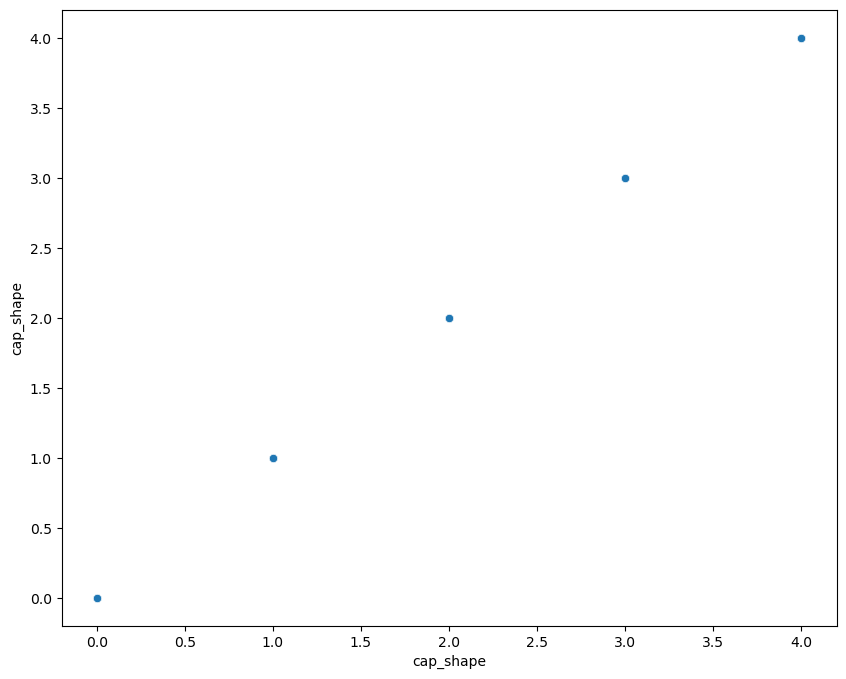

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='cap_shape', y='cap_shape', data=x_train)
plt.show()

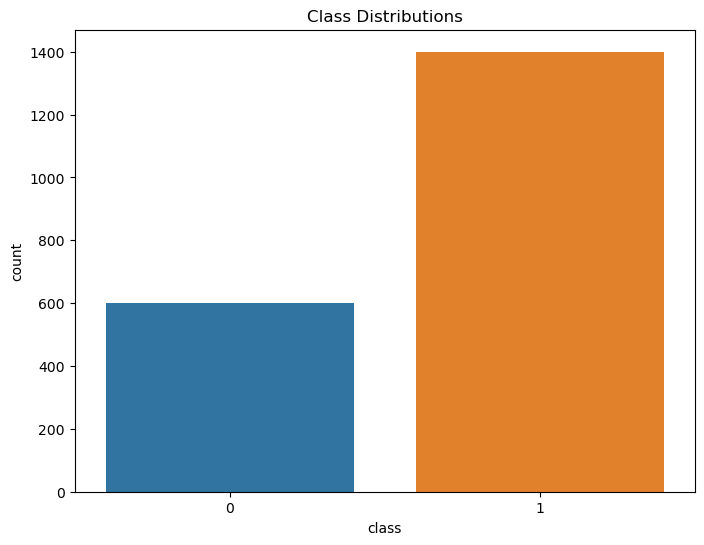

In [17]:
# Bar chart to visualize class distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distributions')
plt.show()

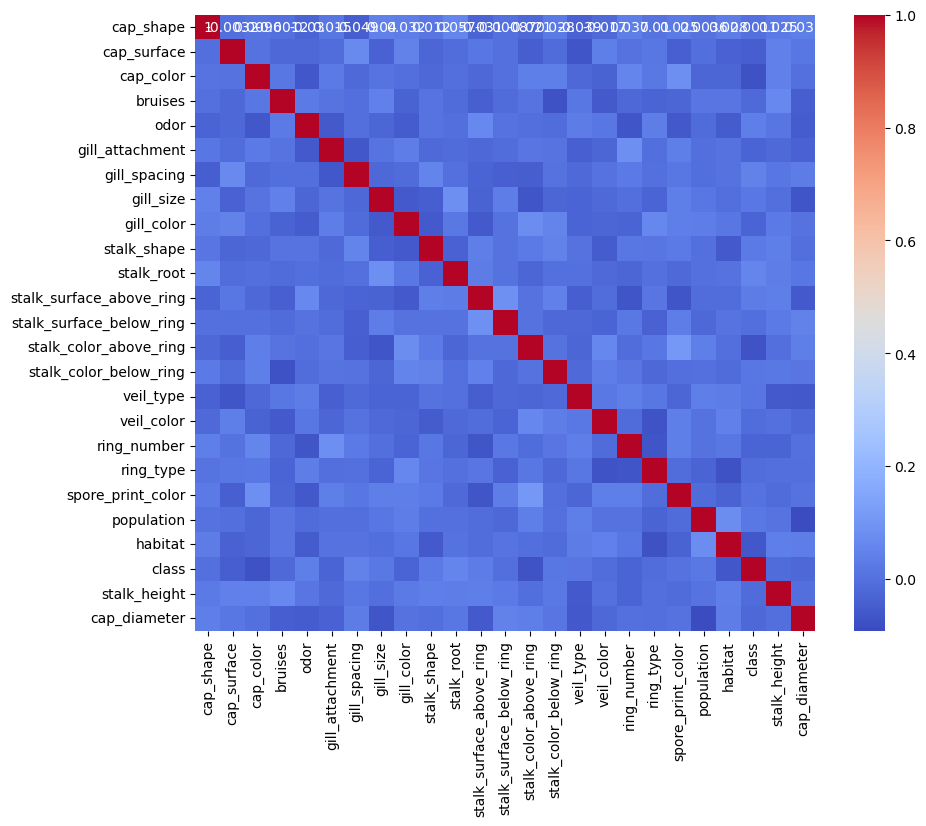

In [18]:
# Heatmap to visualize feature correlations
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


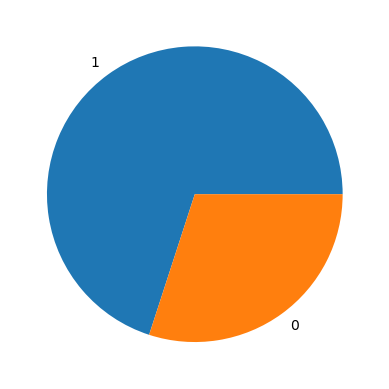

In [19]:
plt.pie(y.value_counts(), labels=y.value_counts().index)
plt.show()

In [20]:
x

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,4,0,1,1,2,6,0,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,4,0,2,1,7,8,2,5,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,6,0,0,2,1,8,0,6,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,5,1,3,1,0,1,5,6,11.092703,8.423199


In [21]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [22]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (1340, 24) (660, 24)
Testing set shape: (1340,) (660,)


In [23]:
resampled_data = pd.concat([x, y], axis=1).sample(500).values
x_resampled = resampled_data[:, :-1]
y_resampled = resampled_data[:, -1]

resampled_data = pd.concat([x, y.to_frame()], axis=1).sample(500)
x_resampled = resampled_data.drop(y.name, axis=1)
y_resampled = resampled_data[y.name]

In [24]:
x_train, y_train = x_resampled[:660], y_resampled[:660]
y_train = y_train.to_numpy().reshape(-1, 1)


In [25]:
regressor = SVR()
multi_regressor = MultiOutputRegressor(regressor)
grid = [{'estimator__kernel': ['poly', 'rbf', 'linear'], 
         'estimator__gamma': [0.5, 0.1, 0.01], 
         'estimator__C': [10, 0.1, 0.001, 0.0001]}]

model = RandomizedSearchCV(multi_regressor, grid, cv=3, verbose=300)
model.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf
[CV 1/3; 1/10] END estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf;, score=-0.106 total time=   0.0s
[CV 2/3; 1/10] START estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf
[CV 2/3; 1/10] END estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf;, score=-0.291 total time=   0.0s
[CV 3/3; 1/10] START estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf
[CV 3/3; 1/10] END estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf;, score=-0.115 total time=   0.0s
[CV 1/3; 2/10] START estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf
[CV 1/3; 2/10] END estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf;, score=-0.107 total time=   0.0s
[CV 2/3; 2/10] START estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf
[CV 2/3; 2/10] END estimator__C=0.

RandomizedSearchCV(cv=3, estimator=MultiOutputRegressor(estimator=SVR()),
                   param_distributions=[{'estimator__C': [10, 0.1, 0.001,
                                                          0.0001],
                                         'estimator__gamma': [0.5, 0.1, 0.01],
                                         'estimator__kernel': ['poly', 'rbf',
                                                               'linear']}],
                   verbose=300)

In [26]:
model.best_params_,model.best_score_

({'estimator__kernel': 'rbf', 'estimator__gamma': 0.5, 'estimator__C': 10},
 0.209206255670039)

In [27]:
from sklearn.metrics import confusion_matrix


In [28]:
print(type(y_train)) 
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [29]:
print(x_test.shape)


(1340,)


In [30]:

# Set the n_features_in_ attribute manually
# svm_classifier.n_features_in_ = 1

# Now the SVM model should expect 1 feature
# svm_classifier.predict(x_test)


In [31]:

# Select a subset of 24 features from X
x_subset = x.iloc[:, :24]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=1)

# Train the SVM model on the training data
clf.fit(x_train, y_train)

# Evaluate model performance on the testing data
y_pred = clf.predict(x_test)



In [32]:
from sklearn import metrics

# Calculate accuracy, precision, recall, and F1-score
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1-score: 0.5344002998500749


D:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


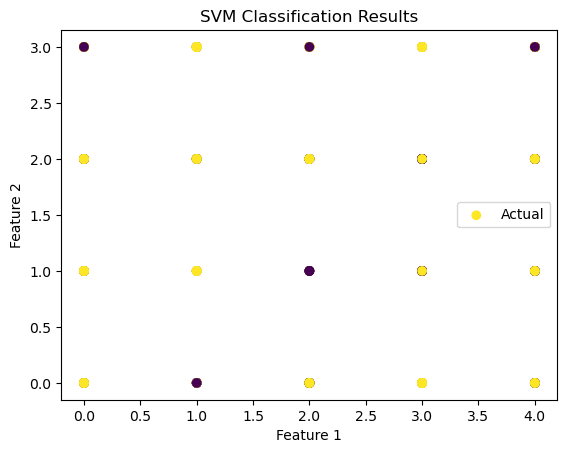

In [38]:
# Visualize the classification results
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification Results')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [39]:

from sklearn import svm
from sklearn.metrics import accuracy_score

# Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
accuracy = []

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Print accuracy for each kernel
for kernel, acc in zip(kernels, accuracy):
    print(f"{kernel}: {acc:.3f}")



linear: 0.667
poly: 0.693
rbf: 0.667
